In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

# https://openml.org/
mnist = fetch_openml("mnist_784", version=1, parser="auto")
X, y = mnist["data"], mnist["target"]

In [63]:
X, y = shuffle(X, y, random_state=42)
X_sample, y_sample = X[:1000], y[:1000]
X_sample = X_sample.to_numpy()
y_sample = y_sample.to_numpy()

In [64]:
tsne = TSNE(n_components=2, perplexity=20, n_iter=10000, n_jobs=4, random_state=42)
X_sample_2d = tsne.fit_transform(X_sample)
print(f"t-SNE iterations: {tsne.n_iter_}")

t-SNE iterations: 9999


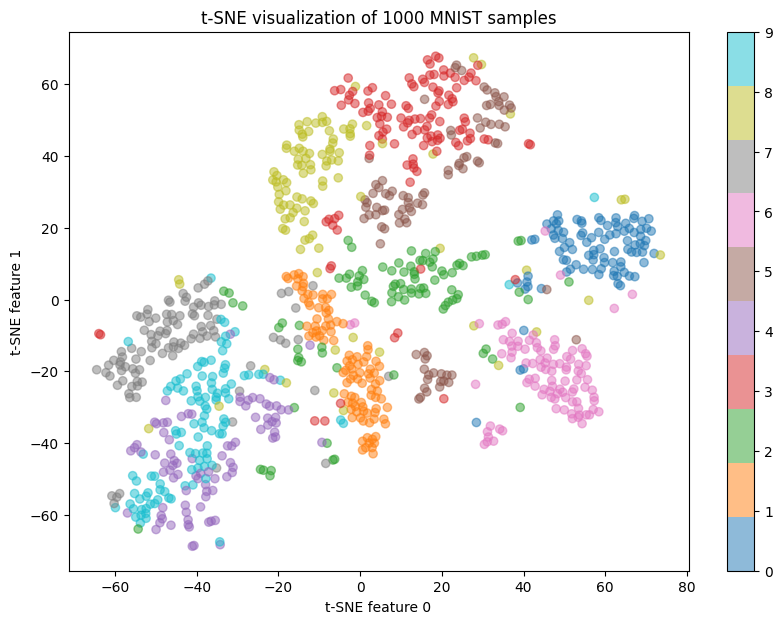

In [65]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_sample_2d[:, 0],
    X_sample_2d[:, 1],
    c=y_sample.astype(int),
    cmap="tab10",
    alpha=0.5,
)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE visualization of 1000 MNIST samples")
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

In [66]:
import base64
import numpy as np
from io import BytesIO
from PIL import Image
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
from bokeh.transform import factor_cmap

# Jupyter Notebook에서 Bokeh 출력 설정
output_notebook()


# Helper function to convert 28x28 flattened image array to base64
def array_to_base64_img(image_array):
    # Reshape to 28x28 and scale
    img = np.uint8(image_array.reshape(28, 28) * 255)
    img = Image.fromarray(img)
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    return "data:image/png;base64," + base64.b64encode(buffered.getvalue()).decode()


# X_sample을 base64 이미지로 변환
image_base64 = [array_to_base64_img(img) for img in X_sample]

# 범주형 값 리스트로 변환
factors = [str(i) for i in range(10)]

# 데이터 소스 설정 (base64 이미지 추가)
source = ColumnDataSource(
    data=dict(
        x=X_sample_2d[:, 0],
        y=X_sample_2d[:, 1],
        digit=[str(d) for d in y_sample],
        image=image_base64,
    )
)

# figure 설정
p = figure(title="t-SNE visualization of 1000 MNIST samples", width=800, height=720)

# 데이터 포인트 그리기
p.circle(
    x="x",
    y="y",
    source=source,
    size=10,
    color=factor_cmap("digit", palette=Category10[10], factors=factors),
    legend_field="digit",
)

# HoverTool 설정 (base64 이미지 표시)
hover = HoverTool(
    tooltips="""
    <div>
        <img src="@image" alt="No image" width="32" height="32""/>
        <div>Digit: @digit</div>
    </div>
"""
)

# HoverTool 추가
p.add_tools(hover)

# 그래프 출력
show(p)

Loading BokehJS ...